<a href="https://colab.research.google.com/github/Syed-Irfan-1165/ML-Classification/blob/master/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction 

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Project Type** - Machine Learning Classification
**:**
*  **Member 1** - Syed Khaja Irfanuddin


#Project Summary

The project on cardiovascular risk prediction aims to develop a model that can accurately predict the likelihood of an individual developing cardiovascular disease (CVD) based on demographic and lifestyle factors. The goal is to provide a personalized risk score for each individual, allowing healthcare providers to intervene and prevent or mitigate the disease.

The model will take into account factors such as age, gender, family history, smoking, hypertension, obesity, physical inactivity, high cholesterol levels, and diabetes. The project will address the challenge of accurately quantifying the contribution of each factor to the overall CVD risk and taking into account the complex interplay between these factors. The solution will be scalable, easily interpretable, and able to handle missing data.

The end result of this project will be a predictive model that can be used by healthcare providers to prioritize their interventions and improve the outcomes for individuals at high risk of CVD. The model will have the potential to have a significant impact on public health by reducing the incidence of CVD and improving the lives of those affected by the disease.

##Dataset description

### Demographic:
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### Behavioral:
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical( history):
*  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*  Diabetes: whether or not the patient had diabetes (Nominal)

### Medical( current):
*  Tot Chol: total cholesterol level (Continuous)
*  Sys BP: systolic blood pressure (Continuous)
*  Dia BP: diastolic blood pressure (Continuous)
*  BMI: Body Mass Index (Continuous)
*  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
*  Glucose: glucose level (Continuous)

### Predict variable (desired target):
*  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) 

##Problem Statement

The problem of cardiovascular disease (CVD) prediction involves identifying individuals who are at a higher risk of developing CVD based on various demographic and lifestyle factors. The goal is to accurately assess the likelihood of an individual developing CVD in the near future, allowing healthcare providers to intervene and prevent or mitigate the disease.

#Know Your Data

In [384]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

Imported all the required library to perform our data analysis.\
Lets Import our dataset

In [385]:
#Mount Drive

from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [386]:
#Load Dataset

cv_df = pd.read_csv(r"/content/drive/MyDrive/Classification /data_cardiovascular_risk.csv")

##Understanding the data

###Dataset first view

In [387]:
cv_df.head().T

0      1      2      3      4
id                   0      1      2      3      4
age                 64     36     46     50     64
education          2.0    4.0    1.0    1.0    1.0
sex                  F      M      F      M      F
is_smoking         YES     NO    YES    YES    YES
cigsPerDay         3.0    0.0   10.0   20.0   30.0
BPMeds             0.0    0.0    0.0    0.0    0.0
prevalentStroke      0      0      0      0      0
prevalentHyp         0      1      0      1      0
diabetes             0      0      0      0      0
totChol          221.0  212.0  250.0  233.0  241.0
sysBP            148.0  168.0  116.0  158.0  136.5
diaBP             85.0   98.0   71.0   88.0   85.0
BMI                NaN  29.77  20.35  28.26  26.42
heartRate         90.0   72.0   88.0   68.0   70.0
glucose           80.0   75.0   94.0   94.0   77.0
TenYearCHD           1      0      0      1      0

As we can see, our dataset contains both numerical and categorical columns.\
i.e.
1. Categorical (Ordinal and Nominal) 
2. Numerical (Continous and Discreet)

In [388]:
cv_df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [389]:
# Dataset Rows & Columns count

cv_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [390]:
cv_df.shape

(3390, 17)

The datset contains of total 3390 rows and 17 columns.

### Dataset Information

In [391]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Missing Values/Null Values

In [392]:
# Missing Values/Null Values Count

cv_df.describe().T

count         mean         std     min     25%      50%  \
id               3390.0  1694.500000  978.753033    0.00  847.25  1694.50   
age              3390.0    49.542183    8.592878   32.00   42.00    49.00   
education        3303.0     1.970936    1.019081    1.00    1.00     2.00   
cigsPerDay       3368.0     9.069477   11.879078    0.00    0.00     0.00   
BPMeds           3346.0     0.029886    0.170299    0.00    0.00     0.00   
prevalentStroke  3390.0     0.006490    0.080309    0.00    0.00     0.00   
prevalentHyp     3390.0     0.315339    0.464719    0.00    0.00     0.00   
diabetes         3390.0     0.025664    0.158153    0.00    0.00     0.00   
totChol          3352.0   237.074284   45.247430  107.00  206.00   234.00   
sysBP            3390.0   132.601180   22.292030   83.50  117.00   128.50   
diaBP            3390.0    82.883038   12.023581   48.00   74.50    82.00   
BMI              3376.0    25.794964    4.115449   15.96   23.02    25.38   
heartRate        3389.0    75.977279   11.971868   45.00   68.00    75.00   
glucose          3086.0    82.086520   24.244753   40.00   71.00    78.00   
TenYearCHD       3390.0     0.150737    0.357846    0.00    0.00     0.00   

                     75%     max  
id               2541.75  3389.0  
age                56.00    70.0  
education           3.00     4.0  
cigsPerDay         20.00    70.0  
BPMeds              0.00     1.0  
prevalentStroke     0.00     1.0  
prevalentHyp        1.00     1.0  
diabetes            0.00     1.0  
totChol           264.00   696.0  
sysBP             144.00   295.0  
diaBP              90.00   142.5  
BMI                28.04    56.8  
heartRate          83.00   143.0  
glucose            87.00   394.0  
TenYearCHD          0.00     1.0

In [393]:
cv_df.describe(include='all').T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

In [394]:
#writing a define funtion to extract the count,unique and missing values and creating  a seperate dataframe

def show_missing(df):
    
    column=[]
    count = []
    unique = []
    missing = []
    
    for item in df.columns: 
        column.append(item)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        
        

    output = pd.DataFrame({
        'column':column,
        'count': count,
        'unique': unique,
        'missing': missing,
        
    })    
        
    return output

In [395]:
show_missing(cv_df)

column  count  unique  missing
0                id   3390    3390        0
1               age   3390      39        0
2         education   3390       5       87
3               sex   3390       2        0
4        is_smoking   3390       2        0
5        cigsPerDay   3390      33       22
6            BPMeds   3390       3       44
7   prevalentStroke   3390       2        0
8      prevalentHyp   3390       2        0
9          diabetes   3390       2        0
10          totChol   3390     241       38
11            sysBP   3390     226        0
12            diaBP   3390     142        0
13              BMI   3390    1260       14
14        heartRate   3390      69        1
15          glucose   3390     133      304
16       TenYearCHD   3390       2        0

Now, we can see that how many how many unique values are present in categorical variables and numerical variables.

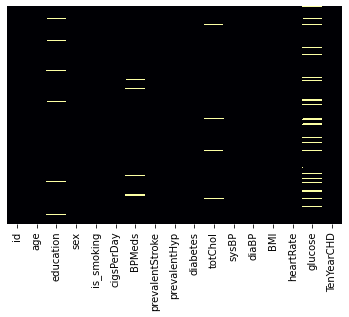

In [396]:
sns.heatmap(cv_df.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [397]:
missing = cv_df.columns[cv_df.isnull().any()].tolist()
print(round(cv_df[missing].isnull().sum().sort_values(ascending = False)/len(cv_df)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


1. From the above heatmap we can see that the column education,BPMeds,toChol contains few missing values wheras the column glucose contains approx 9% of missing data.
2. We will be using median to replace the missing values.

In [398]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  cv_df[col] = cv_df[col].fillna(cv_df[col].median())

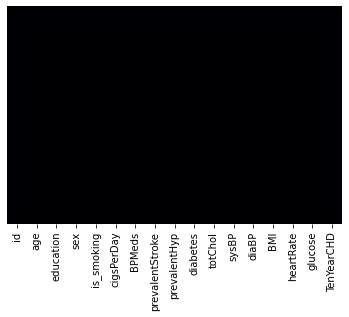

In [399]:
sns.heatmap(cv_df.isnull(),yticklabels=False,cbar=False,cmap='inferno')

 The data is filled with median values. So for further study, we are defining two lists as categorical and numerical variables.


In [400]:
#seperating our Categorical and Numerical data

Categorical_f1 = ['education','cigsPerDay', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Numerical_f2 =  ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [401]:
print(Categorical_f1)
print(Numerical_f2)

['education', 'cigsPerDay', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [402]:
print(cv_df['TenYearCHD'].value_counts().reset_index(),"\n")

   index  TenYearCHD
0      0        2879
1      1         511 



Here TenYearCHD is the dependent variable and we can observe that only 16% (511/3390) of the total dataset is in **'1' or 'Yes'** class, remaining 2879/3390 are in **'0' or 'No'** class it is clear that our data is **Imbalanced**. We may face some difficulty in building model regarding this.

#**EDA**

##**Univariate Analysis**

###Data analysis with a **Donut Chart**

In [403]:
import plotly.express as px

fig = px.pie(cv_df['TenYearCHD'].value_counts(), values='TenYearCHD', names='TenYearCHD', title='Cardiovascular Risk rate', labels='TenYearCHD')

fig = fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['BPMeds'].value_counts(), values='BPMeds', names='BPMeds', title='Blood pressure rate of people', labels='BPMeds')

fig = fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['prevalentStroke'].value_counts(), values='prevalentStroke', names='prevalentStroke', title='% people who had Stroke previously', labels='prevalentStroke')

fig = fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['prevalentHyp'].value_counts(), values='prevalentHyp', names='prevalentHyp', title='% people who had hypertension previously', labels='prevalentHyp')

fig = fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['diabetes'].value_counts(), values='diabetes', names='diabetes', title='% people who had diabetes', labels='diabetes')

fig = fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=16)

fig.show()

fig = px.pie(cv_df['education'].value_counts(), values='education', names='education', title='Education level of people', labels='education')

fig = fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=16)

fig.show()

In [404]:
# Using Donut chart to analyse the individual data
from typing import Any
import plotly.subplots as sp
import plotly.graph_objs as go

fig = sp.make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

trace1 = go.Pie(labels=['Risk', 'Non Risk'], 
                values=cv_df['TenYearCHD'].value_counts(),
                name='Cardiovascular Risk rate',
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace2 = go.Pie(labels=['Not Under BP medication', 'under BP medication'], 
                values=cv_df['BPMeds'].value_counts(),
                name='Blood pressure rate of people',
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace3 = go.Pie(labels=['No Stroke', 'Stroke'], 
                values=cv_df['prevalentStroke'].value_counts(),
                name='"% people who had Stroke previously',
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace4 = go.Pie(labels=['Not hyper tensive','hypertensive'], 
                values=cv_df['prevalentHyp'].value_counts(),
                name="% people who had hypertension previously",
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace5 = go.Pie(labels=['No diabetis','having diabetis'], 
                values=cv_df['diabetes'].value_counts(),
                name="% people who had diabetes",
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)

trace6 = go.Pie(labels=['Basic Education','Intermidiate Education','Bachelors Education','Highest Education'], 
                values=cv_df['education'].value_counts(),
                name="Education level of people ",
                textposition='inside', 
                textinfo='percent+label',
                hole=0.5)



fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)
fig.add_trace(trace5)
fig.add_trace(trace6)

fig.update_layout(title="", 
                  showlegend=True, 
                  width=1000, 
                  height=400,
                  margin=dict(l=0, r=0, t=50, b=0))

def update_title(trace, points, selector):
    fig.update_layout(title=trace.name)

trace1.on_click(update_title)
trace2.on_click(update_title)

fig.show()




From the Analysis we can see that:
1. A total of 85% of people are at risk, while only 15% are not.
2. 3% of the population is taking blood pressure medication.
3. 1% of people experienced a heart attack.
4. 32% of the population is hypertensive.
5. Majority (98% of people) are non diabetic.
6.A total of 41% of the population have basic education, 11% have the highest education level, 16.2% have a bachelor's degree, and the remainder individuals have just completed high school.

In [405]:
# import plotly.subplots as sp
# import plotly.graph_objs as go

# fig = sp.make_subplots(rows=1, cols=2,
#                        specs=[[{"type": "pie"}, {"type": "pie"}]])

# trace1 = go.Pie(labels=['Non Risk', 'Risk'],
#                 values=cv_df['TenYearCHD'].value_counts(),
#                 name='Cardiovascular Risk rate',
#                 textposition='inside',
#                 textinfo='percent+label')

# trace2 = go.Pie(labels=['Not Under BP medication', 'under BP medication'],
#                 values=cv_df['BPMeds'].value_counts(),
#                 name='Blood pressure rate of people',
#                 textposition='inside',
#                 textinfo='percent+label')

# fig.add_trace(trace1, 1, 1)
# fig.add_trace(trace2, 1, 2)

# fig.update_layout(title="Cardiovascular and Blood Pressure rate",
#                   showlegend=True,
#                   width=1000,
#                   height=400,
#                   margin=dict(l=0, r=0, t=50, b=0))

# def update_title(trace, points, selector):
#     fig.update_layout(title=trace.name)

# trace1.on_click(update_title)
# trace2.on_click(update_title)

# fig.show()

In [406]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# pal_ = list(sns.color_palette(palette='dark',n_colors=len(cv_df['age'])).as_hex())




# fig = px.pie(cv_df['TenYearCHD'].value_counts(), values='TenYearCHD',names='TenYearCHD',
#               color_discrete_sequence=pal_)

# fig = px.pie(cv_df['education'].value_counts(), values='education',names='education',
#              color_discrete_sequence=px.colors.sequential.RdBu)




# fig.update_traces(textposition='outside', textinfo='percent+label', 
#                   hole=.5, hoverinfo="label+percent+name")
# fig.update_layout(width = 800, height = 600,
#                   margin = dict(t=0, l=0, r=0, b=0))
# fig.show()

###Data Analysis with Histogram

In [407]:
for i in Numerical_f2:
  if i != 'id':
    fig = px.histogram(cv_df, x=i, nbins=50, hover_data=cv_df.columns)
    fig.update_layout(title=i)
    fig.show()

##**Bivariate Analysis**

##Dependent Variable(TenYearCHD) Vs Numerical Columns

In [408]:
Numerical_f2

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [409]:
#Using barplot
for i in Numerical_f2:
    fig = px.bar(cv_df, y=i, x="TenYearCHD", color_discrete_sequence=px.colors.sequential.Plasma)
    fig.update_traces(hoverinfo='text', text=[f'{i}: {val}TenYearCHD: {chd}' for val, chd in zip(cv_df[i], cv_df["TenYearCHD"])])
    fig.update_layout(title='TenYearCHD Vs Numerical Features',
                  showlegend=True, 
                  width=1000, 
                  height=400,
                  margin=dict(l=0, r=0, t=50, b=0))
    fig.show()

In [410]:
#using violin plot
for i in Numerical_f2:
    fig = px.violin(cv_df, y=i, x="TenYearCHD", box=True, points="all")
    fig.update_traces(hoverinfo='text', text=[f'{i}: {val}TenYearCHD: {chd}' for val, chd in zip(cv_df[i], cv_df["TenYearCHD"])])
    fig.update_layout(title='TenYearCHD Vs Numerical Features',
                  showlegend=True, 
                  width=1000, 
                  height=400,
                  margin=dict(l=0, r=0, t=50, b=0))
    fig.show()

Following the charting of the dependent variable and all numerical variables.
I can state that.

1. The majority of patients with cardiovascular risk (CVR) are between the ages of 48 and 70.

2. Both types of people who are at risk of CVR and those who are not are similar in terms of their cholesterol levels. People who are not at risk for CVR are less likely to have high cholesterol levels.

3. Most people have normal blood pressure when we examine both systolic and diastolic pressure. The CVR is difficult to interpret, so.

4. Even while many people have BMIs within the normal range, those who do have high BMIs are nevertheless at risk for CVR.

5. Since many persons have heartrates within the normal range, it is not yet suitable to draw conclusions regarding the CVR.

6. In terms of glucose levels, both types of people exhibit certain outliers (who are at risk and not at risk). However, those with high blood sugar levels fall within the CVR category. We can therefore assume that it is even one of the factors that may affect CVR.

##Dependent Variable(TenYearCHD) Vs Categorical Columns

In [411]:
Categorical_f1

['education',
 'cigsPerDay',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [412]:
import plotly.express as px

def habitPlot(df, col):
    fig = px.histogram(df, x=col, color='TenYearCHD',barmode="group", nbins=30,
                       title='Comparison - {}'.format(col),
                       color_discrete_sequence=["#440154", "#21918c"])
    fig.update_layout(xaxis_title=col, yaxis_title='Count',showlegend=True, 
                  width=900, 
                  height=400,
                  legend_title_text='CVR (0),CVR (1)')
    fig.show()

habitPlot(cv_df, 'education')
habitPlot(cv_df, 'sex')
habitPlot(cv_df, 'is_smoking')
habitPlot(cv_df, 'BPMeds')
habitPlot(cv_df, 'prevalentStroke')
habitPlot(cv_df, 'prevalentHyp')


From the plot between the category variables and the dependent variable shown above.We can infer that

(1) Those who are already experiencing hypertension are more susceptible to CVR.

(2) However, it differs for persons who have previously experienced a stroke attack. The risk of CVR is highest for those who have never had a stroke.

(3) People are susceptible to CVR whether or not they smoke.

(4) It's astonishing to discover how little the danger of CVR affects those who never received any medicines. Those who take blood pressure drugs run a significant risk of CVR.

(5) When we compare males and females, males are at more risk of CVR.

(6) We can clearly see that, the people who had only basic education i.e., education 1 are at more risk of CVR. And its gradually decreasing with increase in education. It might be because that the people wo are educated are taking much precaustions to avoid CVR.

##**Multivariate Analysis**

In [413]:
Numerical_f2

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

### Age and TenYearCHD with other numerical columns

In [414]:

for i in Numerical_f2:
  if i != 'age':
    fig=px.bar(data_frame=cv_df,
                x="age",
                y=i,
                color='TenYearCHD')
    fig.update_layout(showlegend=True,
                  width=1000, 
                  height=600,
                 )
    fig.show()

From the above plot we can see that:
1. People older than 34 years were at risk for CVR. Additionally, none of the other numerical factors considered age.
2. When compared to those who are not at risk of CVR, the cholesterol level for these individuals is slightly higher. And at the age of 70, even though their cholesterol levels were slightly decreased, they were still at risk for CVR.
3.Systolic blood pressure, diastolic blood pressure, heart rate, and BMI taken together to reach an overall conclusion, we can say that everyone who is at risk has higher values for these measurements than those who are not at risk of CVR.

### Sex and TenYearCHD with other numerical columns

In [415]:
for i in Numerical_f2:
   fig = px.violin(cv_df, y=i, x="sex",color='TenYearCHD')
   fig.update_layout(showlegend=True)
   fig.show()

From this, we can infer that,

1. Females have elevated blood pressure, heart rates, BMIs, and even glucose levels. However, women between the ages of 50 and 70 are more at risk for CVR.

2. Males between the ages of 40 and 70 are more susceptible to CVR.

3. Men who had the highest blood glucose levels are all at risk for CVR.

4. It is clear that men tend to have some of the higher cholesterol readings (alone). They may be at a high risk of CVR as a result of this.

However, many men kept their blood pressure, heart rate, and BMI within the normal range.

### Diabetes and TenYearCHD with other numerical columns

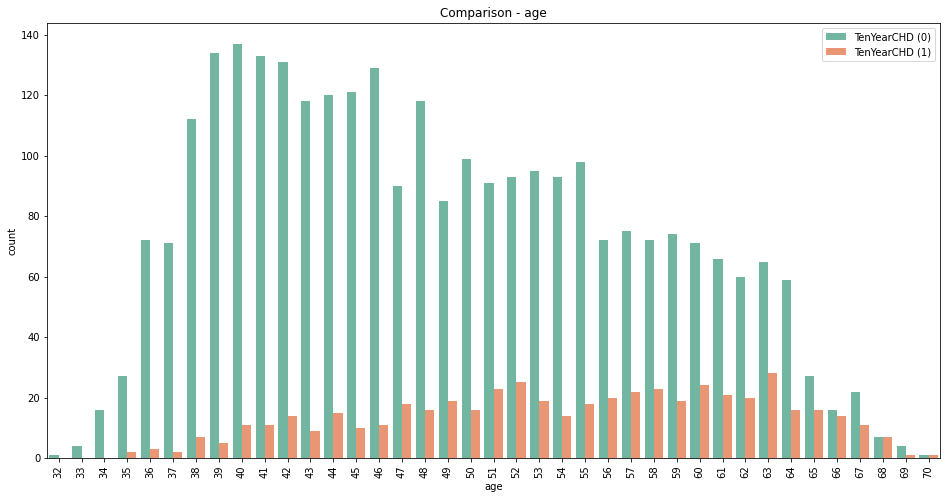

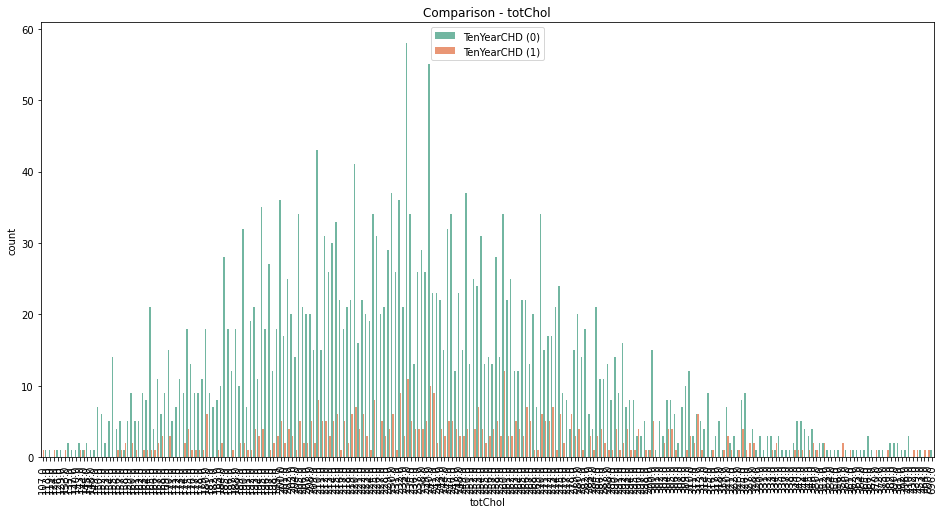

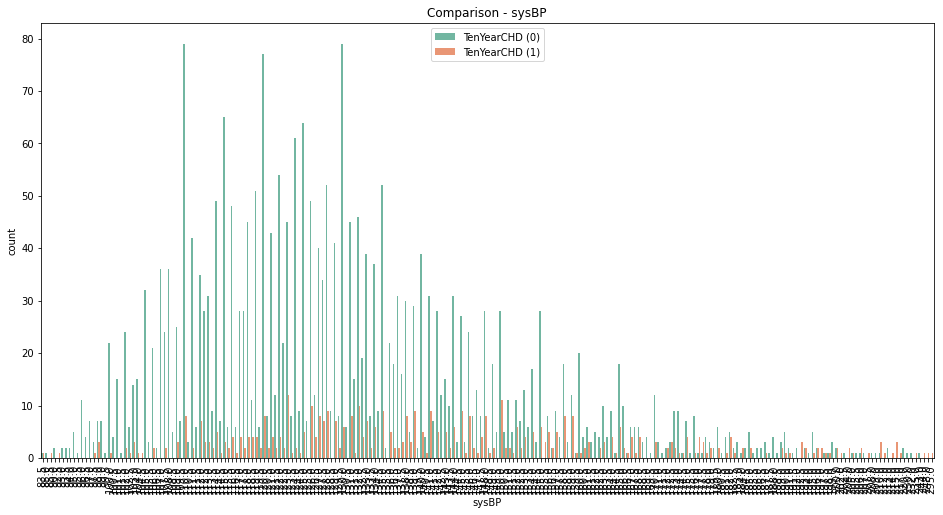

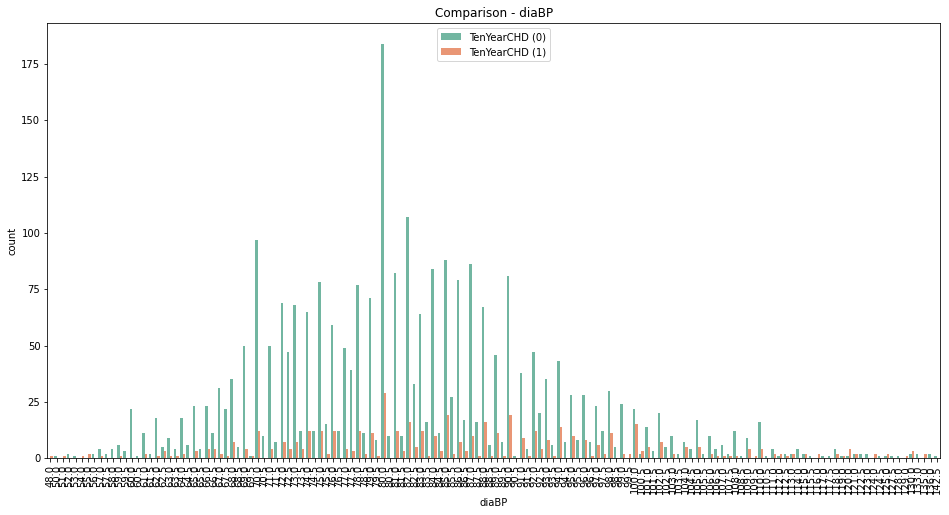

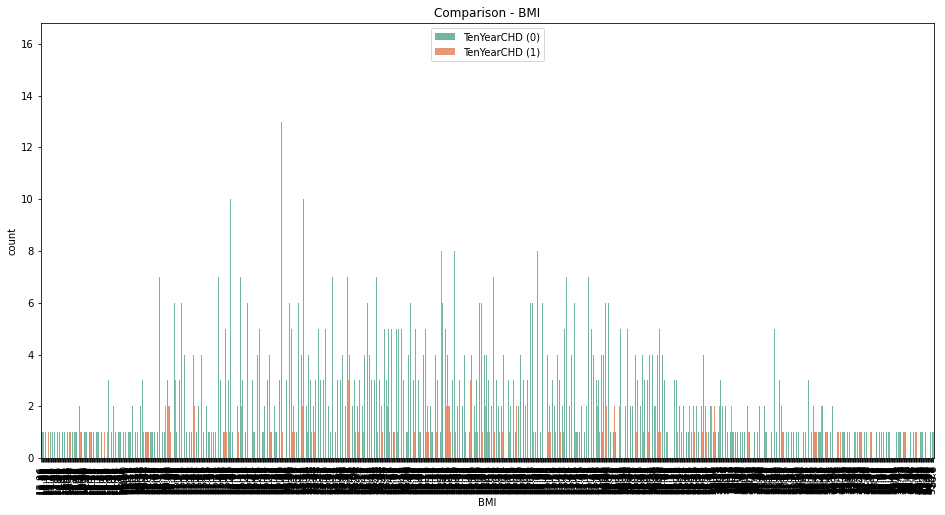

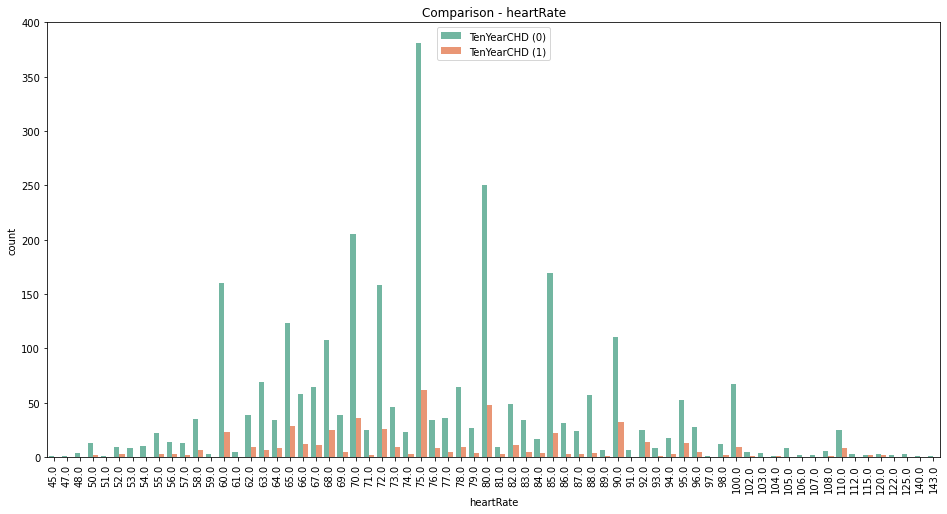

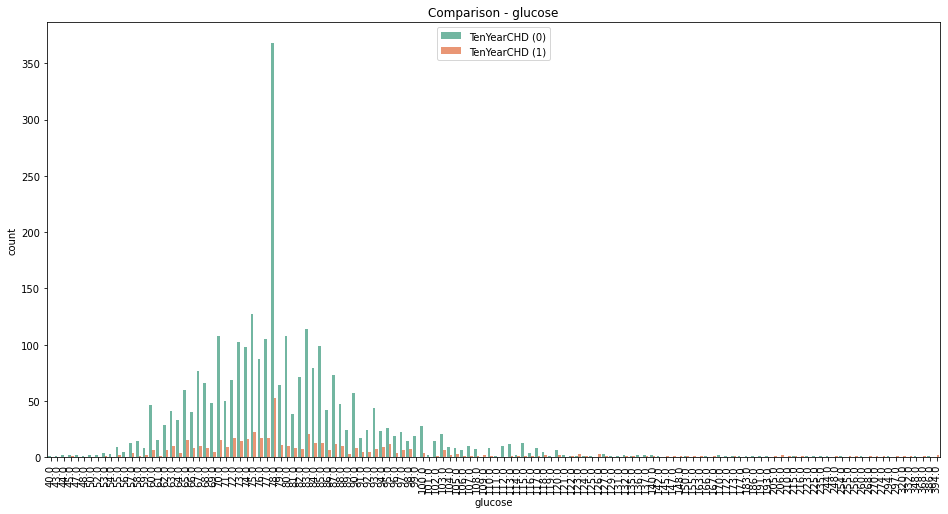

In [416]:
for col in Numerical_f2:
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    sns.countplot(x=col, hue='TenYearCHD', data=cv_df, palette="Set2", ax=ax)
    ax.set_title("Comparison - {}".format(col))
    ax.legend(['TenYearCHD (0)', 'TenYearCHD (1)'])
    plt.show()


Here, it is evident that,

1. Their risk of CVR is the same whether they have diabetes or not. However, it is highest for people aged 50 to 70.

2. Although we claim that cholesterol and diabetes are associated, the facts contradicts this. Despite the fact that many people have very high cholesterol levels, neither diabetes nor CVR are a threat to them. However, persons who have diabetes and have high cholesterol are more likely to develop CVR.

3. Blood pressure and heart rate are unrelated to the diabetes in this case. Many persons who are at risk for CVR and diabetes actually keep their blood pressure and heart rate below acceptable limits.

4. People are at a higher risk of CVR if they already have diabetes and a high BMI.


## **Handling Outliers**

In [417]:
cv_df.drop('id',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

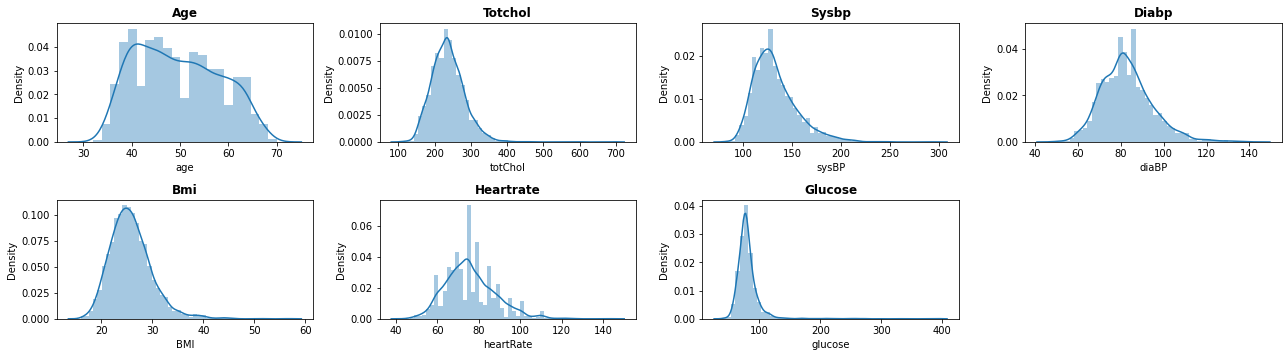

In [418]:
plt.figure(figsize=(18,12))
for n,column in enumerate(Numerical_f2):
  plt.subplot(5, 4, n+1)
  sns.distplot(cv_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [419]:
for column in Numerical_f2:
    fig = px.box(cv_df, y=column, title=f"Box Plot of {column}")
    fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:

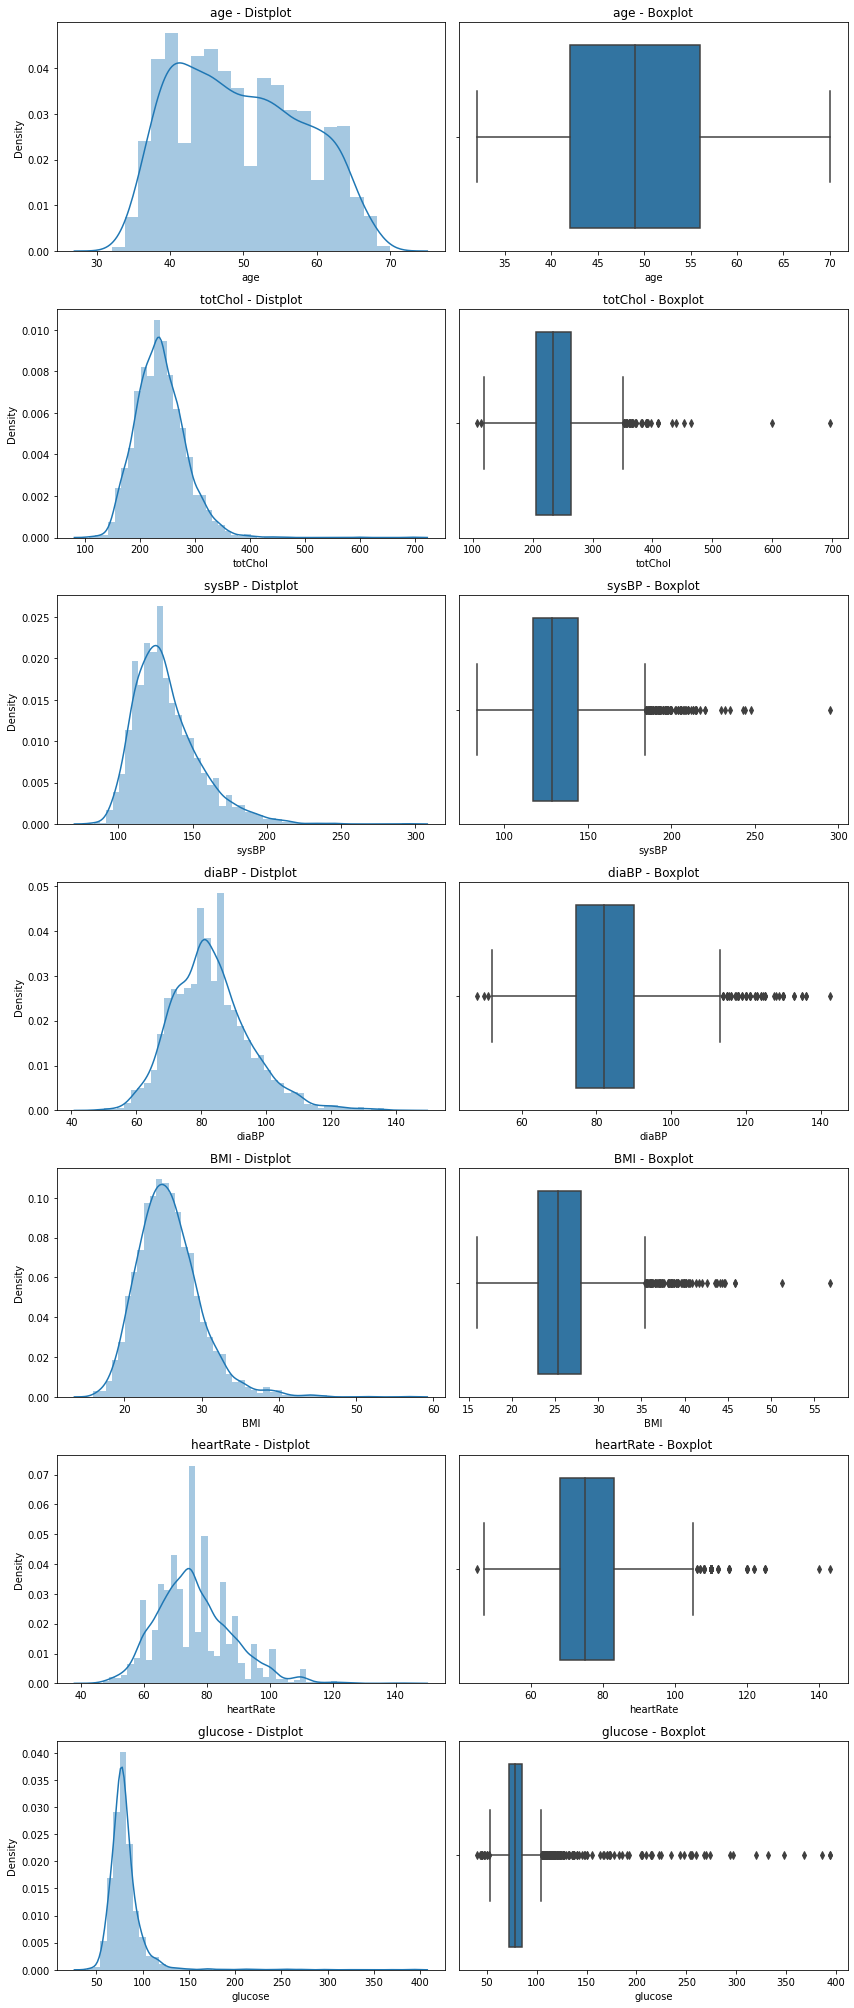

In [420]:
num_cols = Numerical_f2

n_cols = 1
n_rows = 7
n_plots = n_rows * n_cols

# create a subplot for each numerical column
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols*2, figsize=(12, n_rows*4))
for i, col in enumerate(num_cols):
    if i >= n_plots:
        break
    sns.distplot(cv_df[col], ax=axes[i//n_cols, i%n_cols*2])
    sns.boxplot(cv_df[col], ax=axes[i//n_cols, i%n_cols*2 + 1])
    axes[i//n_cols, i%n_cols*2].set_title(col + " - Distplot")
    axes[i//n_cols, i%n_cols*2 + 1].set_title(col + " - Boxplot")

plt.tight_layout()
plt.show()

In [421]:
# #before handling outliers
# num_cols = Numerical_f2

# n_cols = 1
# n_rows = 7
# n_plots = n_rows * n_cols

# # create a subplot for each numerical column
# for i, col in enumerate(num_cols):
#     if i >= n_plots:
#         break
#     fig = px.box(cv_df, x=col)
#     fig2 = px.histogram(cv_df, x=col)
#     fig.update_layout(title=col + " - Boxplot", xaxis_title=col)
#     fig2.update_layout(title=col + " - Distplot", xaxis_title=col)
#     fig.show()
#     fig2.show()


In [422]:
num_cols = Numerical_f2

n_cols = 1
n_rows = 7
n_plots = n_rows * n_cols

# create a subplot for each numerical column
for i, col in enumerate(num_cols):
    if i >= n_plots:
        break
    fig = sp.make_subplots(rows=1, cols=1)
    fig.add_trace(go.Box(x=cv_df[col], name=col + " - Boxplot"))
    fig.add_trace(go.Histogram(x=cv_df[col], name=col + " - Distplot"))
    fig.update_layout(title=col, xaxis_title=col)
    fig.show()


In [423]:
# Removing outliers by standard methods and Plotting graphs:
df = cv_df.copy()
for col in Numerical_f2:
  # Using IQR method to define the range of inliners:
  q1, q3, median = cv_df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  cv_df[col] = np.where(cv_df[col] > upper_limit, median,np.where(
                         cv_df[col] < lower_limit,median,cv_df[col]))

In [424]:
#after handling outliers
num_cols = Numerical_f2

n_cols = 1
n_rows = 7
n_plots = n_rows * n_cols

# create a subplot for each numerical column
for i, col in enumerate(num_cols):
    if i >= n_plots:
        break
    fig = sp.make_subplots(rows=1, cols=1)
    fig.add_trace(go.Box(x=cv_df[col], name=col + " - Boxplot"))
    fig.add_trace(go.Histogram(x=cv_df[col], name=col + " - Distplot"))
    fig.update_layout(title=col, xaxis_title=col)
    fig.show()


# **Feature Engineering**

In [425]:
cv_df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0        2.0   F        YES         3.0     0.0                0   
1  36.0        4.0   M         NO         0.0     0.0                0   
2  46.0        1.0   F        YES        10.0     0.0                0   
3  50.0        1.0   M        YES        20.0     0.0                0   
4  64.0        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### **Converting education into categorical column**

In [426]:
for i in range(len(cv_df)):
  if cv_df['education'][i] == 1:
    cv_df['education'][i] = 'High_school'
  elif cv_df['education'][i] == 2:
    cv_df['education'][i] = 'Bachelor'
  elif cv_df['education'][i] == 3:
    cv_df['education'][i] = 'Master'
  elif cv_df['education'][i] == 4:
    cv_df['education'][i] = 'Phd'

<ipython-input-426-5aa1dc0c0e6f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [427]:
cv_df.head()

age    education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0     Bachelor   F        YES         3.0     0.0                0   
1  36.0          Phd   M         NO         0.0     0.0                0   
2  46.0  High_school   F        YES        10.0     0.0                0   
3  50.0  High_school   M        YES        20.0     0.0                0   
4  64.0  High_school   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### **Converting cigsPerDay into categorical column**

In [428]:
for i in range(len(cv_df)):
  if cv_df['cigsPerDay'][i] == 0:
    cv_df['cigsPerDay'][i] = 'No Cunsumption'
  elif cv_df['cigsPerDay'][i] > 0 and cv_df['cigsPerDay'][i] < 20:
    cv_df['cigsPerDay'][i] = 'Average consumtion'
  else:
    cv_df['cigsPerDay'][i] = 'High Consumption'

<ipython-input-428-0c7ef2a3673a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [429]:
cv_df.head()

age    education sex is_smoking          cigsPerDay  BPMeds  \
0  64.0     Bachelor   F        YES  Average consumtion     0.0   
1  36.0          Phd   M         NO      No Cunsumption     0.0   
2  46.0  High_school   F        YES  Average consumtion     0.0   
3  50.0  High_school   M        YES    High Consumption     0.0   
4  64.0  High_school   F        YES    High Consumption     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    221.0  148.0   85.0  25.38   
1                0             1         0    212.0  168.0   98.0  29.77   
2                0             0         0    250.0  116.0   71.0  20.35   
3                0             1         0    233.0  158.0   88.0  28.26   
4                0             0         0    241.0  136.5   85.0  26.42   

   heartRate  glucose  TenYearCHD  
0       90.0     80.0           1  
1       72.0     75.0           0  
2       88.0     94.0           0  
3       68.0     94.0           1  
4       70.0     77.0           0

### **Creating a new Column using sysBP and diaBP**

In [430]:
cv_df['BP'] = 0

sysBP = cv_df['sysBP']
diaBP = cv_df['diaBP']

for i in range(len(cv_df)):
    if (sysBP[i] < 120) and (diaBP[i] < 80):
        cv_df.at[i, 'BP'] = 1
    elif ((sysBP[i] >= 120) and (sysBP[i] < 130)) and (diaBP[i] < 80):
        cv_df.at[i, 'BP'] = 2
    elif ((sysBP[i] >= 130) and (sysBP[i] < 140)) or ((diaBP[i] >= 80) and (diaBP[i] < 90)):
        cv_df.at[i, 'BP'] = 3
    elif ((sysBP[i] >= 140) and (sysBP[i] < 180)) or ((diaBP[i] >= 90) and (diaBP[i] < 120)):
        cv_df.at[i, 'BP'] = 4
    elif (sysBP[i] >= 180) or (diaBP[i] >= 120):
        cv_df.at[i, 'BP'] = 5
        
cols_BP = ['sysBP', 'diaBP']
cv_df.drop(cols_BP, axis= 1, inplace= True)

In [431]:
cv_df.head()

age    education sex is_smoking          cigsPerDay  BPMeds  \
0  64.0     Bachelor   F        YES  Average consumtion     0.0   
1  36.0          Phd   M         NO      No Cunsumption     0.0   
2  46.0  High_school   F        YES  Average consumtion     0.0   
3  50.0  High_school   M        YES    High Consumption     0.0   
4  64.0  High_school   F        YES    High Consumption     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol    BMI  heartRate  \
0                0             0         0    221.0  25.38       90.0   
1                0             1         0    212.0  29.77       72.0   
2                0             0         0    250.0  20.35       88.0   
3                0             1         0    233.0  28.26       68.0   
4                0             0         0    241.0  26.42       70.0   

   glucose  TenYearCHD  BP  
0     80.0           1   3  
1     75.0           0   4  
2     94.0           0   1  
3     94.0           1   3  
4     77.0           0   3

# **Multicolinearity Check**

In [432]:
fig = px.imshow(cv_df.corr(), color_continuous_scale='icefire')
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    annotations=[
        dict(
            x=i,
            y=j,
            text=round(cv_df.corr().values[j][i], 2),
            font=dict(color='gray'),
            showarrow=False
        )
        for i in range(len(cv_df.corr()))
        for j in range(len(cv_df.corr()))],
        height=600,
        width=1000
)
fig.show()


# **OneHot Encoding**

In [433]:
Categorical_f1

['education',
 'cigsPerDay',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [434]:
#Updating Categorical features
Categorical_f1=['education','sex','is_smoking','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD','BP']


In [435]:
#Dropping the  dependent variable
DF = cv_df[Categorical_f1]
DF.drop('TenYearCHD',axis=1,inplace=True)



/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [436]:
DF

education sex is_smoking          cigsPerDay  BPMeds  prevalentStroke  \
0        Bachelor   F        YES  Average consumtion     0.0                0   
1             Phd   M         NO      No Cunsumption     0.0                0   
2     High_school   F        YES  Average consumtion     0.0                0   
3     High_school   M        YES    High Consumption     0.0                0   
4     High_school   F        YES    High Consumption     0.0                0   
...           ...  ..        ...                 ...     ...              ...   
3385  High_school   F         NO      No Cunsumption     0.0                0   
3386  High_school   F         NO      No Cunsumption     0.0                0   
3387       Master   M        YES  Average consumtion     0.0                0   
3388  High_school   M         NO      No Cunsumption     0.0                0   
3389       Master   F         NO      No Cunsumption     0.0                0   

      prevalentHyp  diabetes  BP  
0                0         0   3  
1                1         0   4  
2                0         0   1  
3                1         0   3  
4                0         0   3  
...            ...       ...  ..  
3385             0         0   2  
3386             0         0   1  
3387             1         0   3  
3388             1         0   4  
3389             0         0   2  

[3390 rows x 9 columns]

In [437]:
#performing OneHotEncoding
DF = pd.get_dummies(DF, columns=DF.columns)
DF.head()
     

education_Bachelor  education_High_school  education_Master  education_Phd  \
0                   1                      0                 0              0   
1                   0                      0                 0              1   
2                   0                      1                 0              0   
3                   0                      1                 0              0   
4                   0                      1                 0              0   

   sex_F  sex_M  is_smoking_NO  is_smoking_YES  cigsPerDay_Average consumtion  \
0      1      0              0               1                              1   
1      0      1              1               0                              0   
2      1      0              0               1                              1   
3      0      1              0               1                              0   
4      1      0              0               1                              0   

   cigsPerDay_High Consumption  ...  prevalentStroke_1  prevalentHyp_0  \
0                            0  ...                  0               1   
1                            0  ...                  0               0   
2                            0  ...                  0               1   
3                            1  ...                  0               0   
4                            1  ...                  0               1   

   prevalentHyp_1  diabetes_0  diabetes_1  BP_1  BP_2  BP_3  BP_4  BP_5  
0               0           1           0     0     0     1     0     0  
1               1           1           0     0     0     0     1     0  
2               0           1           0     1     0     0     0     0  
3               1           1           0     0     0     1     0     0  
4               0           1           0     0     0     1     0     0  

[5 rows x 24 columns]

## **Checking correlation after performing OneHotEncoding**

In [438]:
fig = px.imshow(DF.corr(), color_continuous_scale='gray')
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    annotations=[
        dict(
            x=i,
            y=j,
            text=round(DF.corr().values[j][i], 2),
            font=dict(color='gray'),
            showarrow=False
        )
        for i in range(len(DF.corr()))
        for j in range(len(DF.corr()))],
        height=1000,
        width=3000
)
fig.show()

In [439]:
#dropping "is smoking" column, which has a strong correlation with the consumption of cigerate

DF.drop('is_smoking_YES',axis=1,inplace=True)
DF.drop('is_smoking_NO',axis=1,inplace=True)


In [440]:
fig = px.imshow(DF.corr(), color_continuous_scale='gray')
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    annotations=[
        dict(
            x=i,
            y=j,
            text=round(DF.corr().values[j][i], 2),
            font=dict(color='darkgoldenrod'),
            showarrow=False
        )
        for i in range(len(DF.corr()))
        for j in range(len(DF.corr()))],
        height=1000,
        width=3000
)
fig.show()

In [441]:
#There is a strong negative correlation between sex, BP medications, and the prevalencestroke.Hence we drop them

DF.drop('sex_F',axis=1,inplace=True)
DF.drop('BPMeds_0.0',axis=1,inplace=True)
DF.drop('prevalentStroke_0',axis=1,inplace=True)
DF.drop('cigsPerDay_No Cunsumption',axis=1,inplace=True)

In [442]:
fig = px.imshow(DF.corr(), color_continuous_scale='magma')
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    annotations=[
        dict(
            x=i,
            y=j,
            text=round(DF.corr().values[j][i], 2),
            font=dict(color='darkgoldenrod'),
            showarrow=False
        )
        for i in range(len(DF.corr()))
        for j in range(len(DF.corr()))],
        height=1000,
        width=3000
)
fig.show()

# **Standardizing the data using StandardScalar**

In [443]:
cv_df.head()

age    education sex is_smoking          cigsPerDay  BPMeds  \
0  64.0     Bachelor   F        YES  Average consumtion     0.0   
1  36.0          Phd   M         NO      No Cunsumption     0.0   
2  46.0  High_school   F        YES  Average consumtion     0.0   
3  50.0  High_school   M        YES    High Consumption     0.0   
4  64.0  High_school   F        YES    High Consumption     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol    BMI  heartRate  \
0                0             0         0    221.0  25.38       90.0   
1                0             1         0    212.0  29.77       72.0   
2                0             0         0    250.0  20.35       88.0   
3                0             1         0    233.0  28.26       68.0   
4                0             0         0    241.0  26.42       70.0   

   glucose  TenYearCHD  BP  
0     80.0           1   3  
1     75.0           0   4  
2     94.0           0   1  
3     94.0           1   3  
4     77.0           0   3

In [444]:
#Updating Numerical column after dropping sysbp,diabp
Numerical_f2 = ['age','totChol','BMI','heartRate','glucose']

In [445]:
#Concatanating categorical and numerical variables
DF_new = cv_df[Numerical_f2].copy()
for i in DF.columns:
  DF_new[i] = DF[i]

In [446]:
DF_new.head()

age  totChol    BMI  heartRate  glucose  education_Bachelor  \
0  64.0    221.0  25.38       90.0     80.0                   1   
1  36.0    212.0  29.77       72.0     75.0                   0   
2  46.0    250.0  20.35       88.0     94.0                   0   
3  50.0    233.0  28.26       68.0     94.0                   0   
4  64.0    241.0  26.42       70.0     77.0                   0   

   education_High_school  education_Master  education_Phd  sex_M  ...  \
0                      0                 0              0      0  ...   
1                      0                 0              1      1  ...   
2                      1                 0              0      0  ...   
3                      1                 0              0      1  ...   
4                      1                 0              0      0  ...   

   prevalentStroke_1  prevalentHyp_0  prevalentHyp_1  diabetes_0  diabetes_1  \
0                  0               1               0           1           0   
1                  0               0               1           1           0   
2                  0               1               0           1           0   
3                  0               0               1           1           0   
4                  0               1               0           1           0   

   BP_1  BP_2  BP_3  BP_4  BP_5  
0     0     0     1     0     0  
1     0     0     0     1     0  
2     1     0     0     0     0  
3     0     0     1     0     0  
4     0     0     1     0     0  

[5 rows x 23 columns]

In [447]:
from sklearn.preprocessing import MinMaxScaler

col_names = list(DF_new.columns)
DF_minmax = pd.DataFrame()

scaler = MinMaxScaler()
minmax = scaler.fit_transform(DF_new[DF_new.columns])
DF_minmax = pd.DataFrame(scaler.fit_transform(DF_new[DF_new.columns]))
DF_minmax.columns = col_names

In [448]:
DF_minmax.head()

age   totChol       BMI  heartRate   glucose  education_Bachelor  \
0  0.842105  0.439655  0.484070   0.741379  0.529412                 1.0   
1  0.105263  0.400862  0.709661   0.431034  0.431373                 0.0   
2  0.368421  0.564655  0.225591   0.706897  0.803922                 0.0   
3  0.473684  0.491379  0.632066   0.362069  0.803922                 0.0   
4  0.842105  0.525862  0.537513   0.396552  0.470588                 0.0   

   education_High_school  education_Master  education_Phd  sex_M  ...  \
0                    0.0               0.0            0.0    0.0  ...   
1                    0.0               0.0            1.0    1.0  ...   
2                    1.0               0.0            0.0    0.0  ...   
3                    1.0               0.0            0.0    1.0  ...   
4                    1.0               0.0            0.0    0.0  ...   

   prevalentStroke_1  prevalentHyp_0  prevalentHyp_1  diabetes_0  diabetes_1  \
0                0.0             1.0             0.0         1.0         0.0   
1                0.0             0.0             1.0         1.0         0.0   
2                0.0             1.0             0.0         1.0         0.0   
3                0.0             0.0             1.0         1.0         0.0   
4                0.0             1.0             0.0         1.0         0.0   

   BP_1  BP_2  BP_3  BP_4  BP_5  
0   0.0   0.0   1.0   0.0   0.0  
1   0.0   0.0   0.0   1.0   0.0  
2   1.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   1.0   0.0   0.0  
4   0.0   0.0   1.0   0.0   0.0  

[5 rows x 23 columns]

# **Feature Selection**

In [449]:
DF_minmax.columns

Index(['age', 'totChol', 'BMI', 'heartRate', 'glucose', 'education_Bachelor',
       'education_High_school', 'education_Master', 'education_Phd', 'sex_M',
       'cigsPerDay_Average consumtion', 'cigsPerDay_High Consumption',
       'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_0', 'prevalentHyp_1',
       'diabetes_0', 'diabetes_1', 'BP_1', 'BP_2', 'BP_3', 'BP_4', 'BP_5'],
      dtype='object')

In [450]:
from sklearn.feature_selection import mutual_info_classif
X = DF_minmax.copy()
y = cv_df['TenYearCHD'].copy()

#determine Mutual info

mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.02082443, 0.00671325, 0.01238095, 0.        , 0.00205684,
       0.        , 0.00642887, 0.00078326, 0.0046125 , 0.00190021,
       0.        , 0.00040986, 0.01207384, 0.00317968, 0.01226427,
       0.01976977, 0.0106991 , 0.01302248, 0.01971043, 0.00339418,
       0.00799078, 0.00541525, 0.00551163])

In [451]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

age                              0.020824
prevalentHyp_1                   0.019770
BP_1                             0.019710
diabetes_1                       0.013022
BMI                              0.012381
prevalentHyp_0                   0.012264
BPMeds_1.0                       0.012074
diabetes_0                       0.010699
BP_3                             0.007991
totChol                          0.006713
education_High_school            0.006429
BP_5                             0.005512
BP_4                             0.005415
education_Phd                    0.004613
BP_2                             0.003394
prevalentStroke_1                0.003180
glucose                          0.002057
sex_M                            0.001900
education_Master                 0.000783
cigsPerDay_High Consumption      0.000410
cigsPerDay_Average consumtion    0.000000
education_Bachelor               0.000000
heartRate                        0.000000
dtype: float64

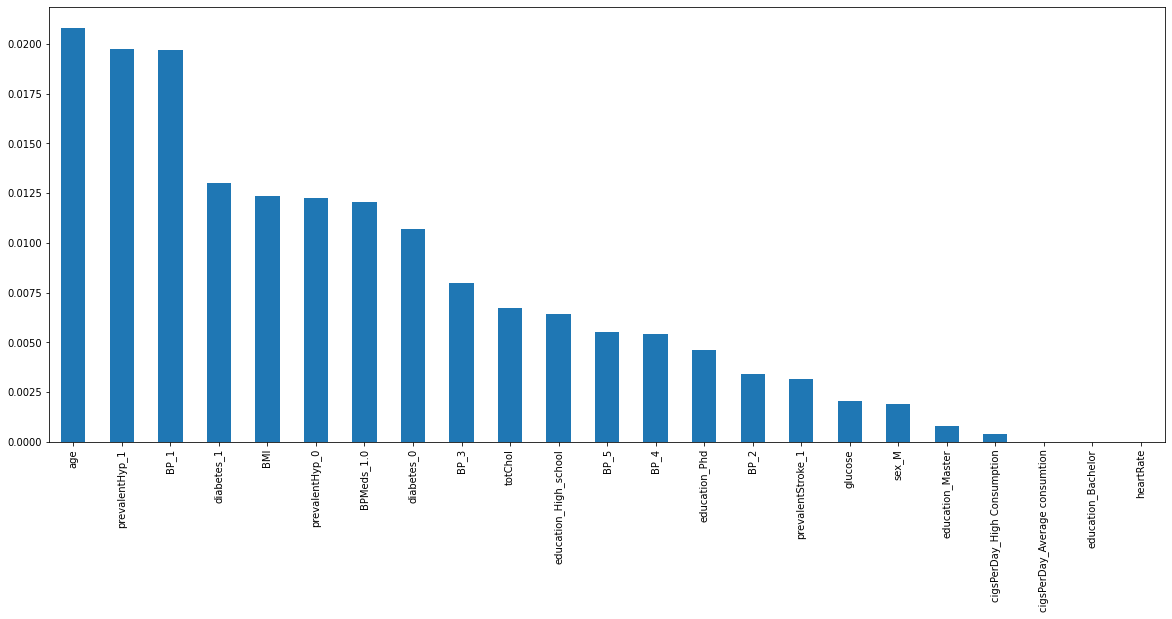

In [452]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [453]:
from sklearn.feature_selection import SelectKBest

sel_ten_cols = SelectKBest(mutual_info_classif, k=14)
sel_ten_cols.fit(X,y)
X.columns[sel_ten_cols.get_support()]

Index(['age', 'totChol', 'BMI', 'glucose', 'education_Phd',
       'cigsPerDay_Average consumtion', 'cigsPerDay_High Consumption',
       'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_1', 'BP_1', 'BP_3',
       'BP_4', 'BP_5'],
      dtype='object')

In [454]:
selected_f3 = ['age', 'totChol', 'BMI', 'education_High_school', 'sex_M',
       'prevalentStroke_1', 'prevalentHyp_0', 'prevalentHyp_1', 'diabetes_0',
       'diabetes_1', 'BP_1', 'BP_2', 'BP_4', 'BP_5','glucose']

In [455]:
len(selected_f3)

15

# **Train Test Split**

In [456]:
X = X[selected_f3]
y = cv_df['TenYearCHD'].copy()

In [457]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# **Balancing the  Imbalanced data using undersampling**

In [458]:
from imblearn.combine import SMOTETomek

In [459]:
#Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [460]:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2011
1     362
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    1947
1    1947
Name: TenYearCHD, dtype: int64 



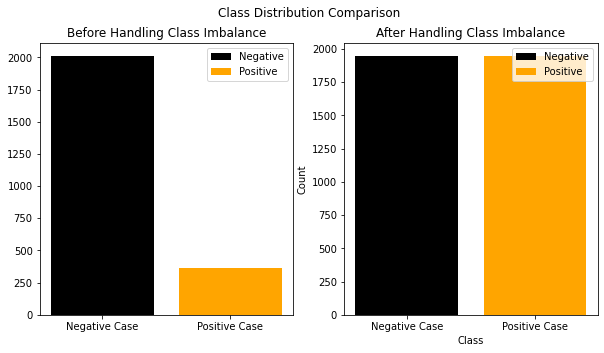

In [461]:
# Get the value counts of each class
y_train_counts = y_train.value_counts()
y_smote_counts = y_smote.value_counts()

# Plot the value counts as bar plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the negative class
axs[0].bar(y_train_counts.index[0], y_train_counts.values[0], color='black', align='center')
axs[0].bar(y_train_counts.index[1], y_train_counts.values[1], color='orange', align='center')
axs[0].set_title("Before Handling Class Imbalance")
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Negative Case', 'Positive Case'])
axs[0].legend(['Negative','Positive'])

# Plot the positive class
axs[1].bar(y_smote_counts.index[0], y_smote_counts.values[0], color='black', align='center')
axs[1].bar(y_smote_counts.index[1], y_smote_counts.values[1], color='orange', align='center')
axs[1].set_title("After Handling Class Imbalance")
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Negative Case', 'Positive Case'])
axs[1].legend(['Negative','Positive'])

# Add labels and title to the plot
plt.xlabel("Class")
plt.ylabel("Count")
plt.suptitle("Class Distribution Comparison")

# Show the plot
plt.show()


In [462]:
# !pip install -U imbalanced-learn


In [463]:
# from imblearn.under_sampling import NearMiss
# from collections import Counter



In [464]:
# X = X[selected_f3]
# y = cv_df['TenYearCHD'].copy()

In [465]:

# num_before = dict(Counter(y_train))

# nm = NearMiss(sampling_strategy=0.8)
# X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

# num_after = dict(Counter(y_resampled))
# print(num_before, num_after)

In [466]:
# labels = ["Negative Cases","Positive Cases"]
# plt.figure(figsize=(15,6))
# plt.subplot(1,2,1)
# sns.barplot(labels, list(num_before.values()))
# plt.title("Numbers Before Balancing")
# plt.subplot(1,2,2)
# sns.barplot(labels, list(num_after.values()))
# plt.title("Numbers After Balancing")
# plt.show()

# **Building Models**

In [467]:
from sklearn.utils.validation import DataConversionWarning
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [468]:

DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=90)
KNN = KNeighborsClassifier(n_neighbors=79)
SVM = SVC(random_state=6)
LGR = LogisticRegression(solver='liblinear')
ABD = AdaBoostClassifier(algorithm='SAMME.R',random_state=42)
NB = GaussianNB()

models = {"Decision tree" : DTC,
          "Random forest" : RFC,
          "KNN" : KNN,
          "SVM" : SVM,
          "Logistic Regression" : LGR,
          "Adaboost" : ABD,
          "Naive Bayes" : NB}
scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[model_name] = model.score(X_test, y_test)

Metrics = pd.DataFrame(scores, index=["Accuracy Score"]).T
Metrics.sort_values(by=["Accuracy Score"], axis=0, ascending=False, inplace=True)
print(Metrics)

                     Accuracy Score
Logistic Regression        0.857424
SVM                        0.855457
KNN                        0.853491
Adaboost                   0.853491
Random forest              0.851524
Decision tree              0.746313
Naive Bayes                0.234022


In [469]:
percentage = Metrics*100

In [470]:
percentage

Accuracy Score
Logistic Regression       85.742380
SVM                       85.545723
KNN                       85.349066
Adaboost                  85.349066
Random forest             85.152409
Decision tree             74.631268
Naive Bayes               23.402163

As we can see the highest accuracy obtained is from Logistic Regression but considering only the accuracy will not be approprite as predicting health risk just based on accuracy may lead to some fatal problem. lets CrossValidate it 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` 

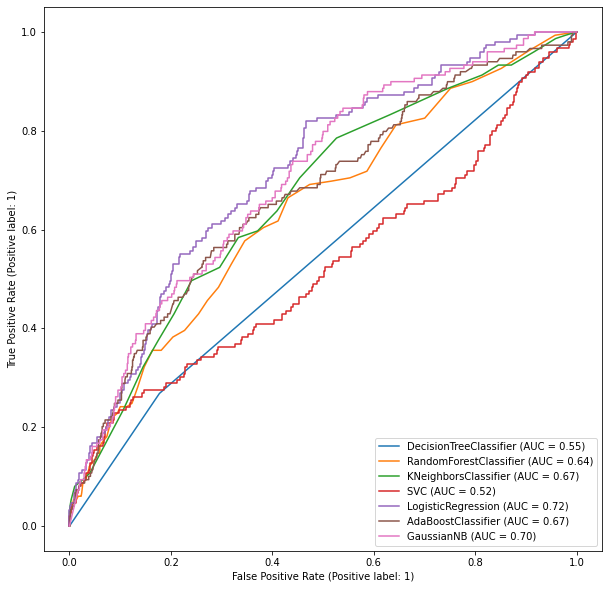

In [505]:
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(DTC, X_test, y_test)
plt.rcParams['figure.figsize'] = (10, 10)
plot_roc_curve(RFC,X_test, y_test, ax = disp.ax_)
plot_roc_curve(KNN,X_test, y_test, ax = disp.ax_)
plot_roc_curve(SVM,X_test, y_test, ax = disp.ax_)
plot_roc_curve(LGR,X_test, y_test, ax = disp.ax_)
plot_roc_curve(ABD,X_test, y_test, ax = disp.ax_)
plot_roc_curve(NB,X_test, y_test, ax = disp.ax_) 

From the ROC curve we can conclude that Naive Bayes and Logistic Regression are well performing.lets evaluate further

In [487]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [488]:
models

{'Decision tree': DecisionTreeClassifier(),
 'Random forest': RandomForestClassifier(n_estimators=90),
 'KNN': KNeighborsClassifier(n_neighbors=79),
 'SVM': SVC(random_state=6),
 'Logistic Regression': LogisticRegression(solver='liblinear'),
 'Adaboost': AdaBoostClassifier(random_state=42),
 'Naive Bayes': GaussianNB()}

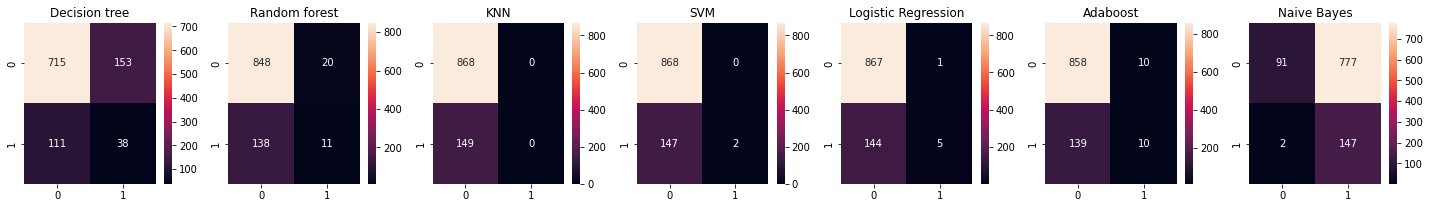

In [489]:
plt.figure(figsize=(20,8))
i = 1
for key, classifier in models.items():
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = plt.subplot(3, 7, i)
    sns.heatmap(cf_matrix, annot=True, ax=ax, fmt='d')
    plt.title(key)
    i += 1

plt.tight_layout()
plt.show()


In [485]:

Matrix = []
for key, value in models.items():
    value.fit(X_train, y_train)
    predicted = value.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    tp, fp, fn, tn = conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1]
    correct_pred, wrong_pred = tp + tn, fp + fn
    model_data = {'Name': key, 'True_positive': tp,
                  'False_positive': fp,
                  'False_negative': fn,
                  'True_negative': tn,
                  'Correct_prediction': correct_pred,
                  'Wrong_prediction': wrong_pred}
    Matrix.append(model_data)
Matrix = pd.DataFrame(Matrix)


In [486]:
Matrix

Name  True_positive  False_positive  False_negative  \
0        Decision tree            726             142             109   
1        Random forest            850              18             138   
2                  KNN            868               0             149   
3                  SVM            868               0             147   
4  Logistic Regression            867               1             144   
5             Adaboost            858              10             139   
6          Naive Bayes             91             777               2   

   True_negative  Correct_prediction  Wrong_prediction  
0             40                 766               251  
1             11                 861               156  
2              0                 868               149  
3              2                 870               147  
4              5                 872               145  
5             10                 868               149  
6            147                 238               779

The highest wrong predictions were made by Naive Bayes and the least wrong predictions wer made by Logistic Regression

In [490]:
models

{'Decision tree': DecisionTreeClassifier(),
 'Random forest': RandomForestClassifier(n_estimators=90),
 'KNN': KNeighborsClassifier(n_neighbors=79),
 'SVM': SVC(random_state=6),
 'Logistic Regression': LogisticRegression(solver='liblinear'),
 'Adaboost': AdaBoostClassifier(random_state=42),
 'Naive Bayes': GaussianNB()}

In [494]:
performance_matrix = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, y_pred_test)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (recall * precision) / (recall + precision)
    
    model_data = {
        "Name": name,
        "Train_accuracy": accuracy_score(y_train, y_pred_train),
        "Test_accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision,
        "Recall": recall,
        "F1_Score": f1_score
    }
    
    performance_matrix.append(model_data)


In [495]:
performance_matrix = pd.DataFrame(performance_matrix)

In [503]:
pm = performance_matrix

In [504]:
pm

Name  Train_accuracy  Test_accuracy  Precision    Recall  \
0        Decision tree        1.000000       0.741396   0.822581  0.867558   
1        Random forest        1.000000       0.843658   0.978111  0.858443   
2                  KNN        0.847450       0.853491   1.000000  0.853491   
3                  SVM        0.849979       0.855457   1.000000  0.855172   
4  Logistic Regression        0.850822       0.857424   0.998848  0.857567   
5             Adaboost        0.854614       0.853491   0.988479  0.860582   
6          Naive Bayes        0.237252       0.234022   0.104839  0.978495   

   F1_Score  
0  0.844471  
1  0.914378  
2  0.920955  
3  0.921933  
4  0.922831  
5  0.920107  
6  0.189386

in medical diagnosis, a high recall is more important than high precision, as the goal is to identify all patients with the disease, even if it means that some of the healthy patients will also be identified as sick. 

In the context of cardiovascular heart risk prediction, it's important to strike a balance between accuracy, precision, and recall.

Accuracy measures the overall correct classification rate, but it doesn't distinguish between false positive and false negative errors.

Precision measures the percentage of positive predictions that are actually positive. It's important to have a high precision when making predictions about a serious condition like heart risk, as a false positive result could cause unnecessary stress and concern.

Recall measures the percentage of actual positive cases that were correctly identified by the model. A low recall value could result in a large number of false negatives, which could be dangerous in the case of a serious condition like heart risk.

Given these trade-offs, it's important to consider both precision and recall in addition to accuracy when building a model for heart risk prediction. The ideal model would have high values for both precision and recall, as well as high accuracy. In some cases, it may be necessary to sacrifice some accuracy in order to achieve a higher precision or recall, depending on the particular use case and the consequences of false positive and false negative errors.

In [475]:
# classifier = LogisticRegression()

In [476]:
# parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [477]:
# classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [478]:
# classifier_regressor.fit(X_train,y_train)

In [479]:
# print(classifier_regressor.best_params_)

In [480]:
# print(classifier_regressor.best_score_)

In [481]:
# y_pred = classifier_regressor.predict(X_test)

In [482]:
# score = accuracy_score(y_pred,y_test)
# print(score)

In [483]:
# print(classification_report(y_pred,y_test))